In [20]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.sparse import csgraph
# from scipy.sparse.linalg import eigsh
from numpy import linalg as LA
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import os 

import plotly.express as px

import numpy as np
import pandas as pd

from sklearn.datasets import load_digits


from sklearn.manifold import TSNE
import hdbscan

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import seaborn as sns
plot_kwds = {'alpha' : 0.25, 's' : 10, 'linewidths':0}

In [21]:
df_train = pd.DataFrame()

for sensor in os.listdir("resultado/"):
   df_train = df_train.append(pd.read_csv("resultado/" + str(sensor)), ignore_index=True)

#df_train = pd.read_csv("resultado/" + str(4990)+".csv")

print(df_train.shape[0])

846792


In [22]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.dropna(inplace=True)

x_train = df_train.iloc[: ,6:].values

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

print(x_train.shape[0])



843673


In [24]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=d)
pca = pca.fit(x_train)
x_train = pca.transform(x_train)

c:\Users\jorge\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\jorge\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


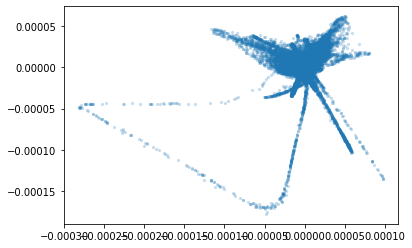

In [25]:
projection = TSNE().fit_transform(x_train)
plt.scatter(*projection.T, **plot_kwds)


In [26]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(x_train)

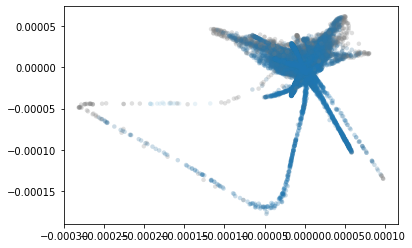

In [27]:
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=20, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [28]:
labels = clusterer.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 2


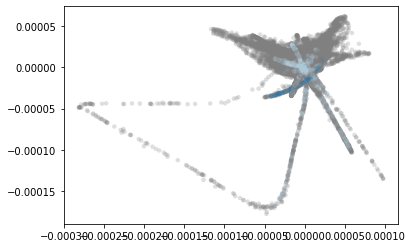

In [29]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=5).fit(x_train)

color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=20, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [30]:
labels = clusterer.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 2


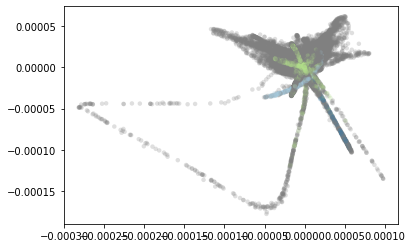

In [31]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=1).fit(x_train)

color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=20, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [32]:
labels = clusterer.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


In [33]:
import umap

clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(x_train)

In [87]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

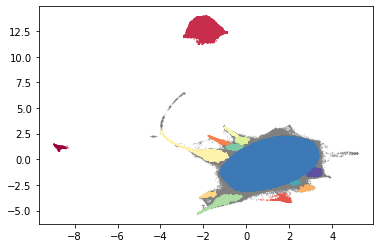

In [88]:
clustered = (labels >= 0)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')

In [89]:
print(df_train.shape)
print(labels)
#df_train = df_train.assign(label = labels)
df_train["label"] = labels
print(df_train.shape)
print(df_train)
df_train.to_csv("umap,min_samples=10,min_cluster_size=500.csv")

labels = labels[clustered]

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

(843673, 81)
[ 1  1 12 ... 12 12 12]
(843673, 81)
        Unnamed: 0   sheep  Sensor      Date  Hour  Minutes  Seconds  \
0                0  4988.0     8.0  22_04_20  10.0     57.0     44.0   
1                1  4988.0     8.0  22_04_20  10.0     58.0      3.0   
2                2  4988.0     8.0  22_04_20  10.0     58.0     22.0   
3                3  4988.0     8.0  22_04_20  10.0     58.0     40.0   
4                4  4988.0     8.0  22_04_20  10.0     58.0     59.0   
...            ...     ...     ...       ...   ...      ...      ...   
846785       47834  5221.0    14.0  22_07_31   8.0     25.0     53.0   
846786       47835  5221.0    14.0  22_07_31   8.0     26.0      8.0   
846787       47836  5221.0    14.0  22_07_31   8.0     26.0     23.0   
846788       47837  5221.0    14.0  22_07_31   8.0     26.0     36.0   
846789       47838  5221.0    14.0  22_07_31   8.0     26.0     51.0   

                SMA          SVM        Energy  ...  a_number_peaks  \
0       1127.6

In [90]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

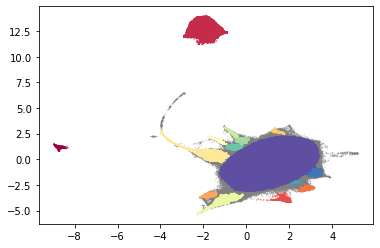

In [91]:
clustered = (labels >= 0)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')

In [92]:
print(df_train.shape)
print(labels)
#df_train = df_train.assign(label = labels)
df_train["label"] = labels
print(df_train.shape)
print(df_train)
df_train.to_csv("umap,min_samples=5,min_cluster_size=500.csv")

labels = labels[clustered]

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

print(len(labels))
print(x_train.shape[0])

(843673, 81)
[ 1  1 14 ... 14 14 14]
(843673, 81)
        Unnamed: 0   sheep  Sensor      Date  Hour  Minutes  Seconds  \
0                0  4988.0     8.0  22_04_20  10.0     57.0     44.0   
1                1  4988.0     8.0  22_04_20  10.0     58.0      3.0   
2                2  4988.0     8.0  22_04_20  10.0     58.0     22.0   
3                3  4988.0     8.0  22_04_20  10.0     58.0     40.0   
4                4  4988.0     8.0  22_04_20  10.0     58.0     59.0   
...            ...     ...     ...       ...   ...      ...      ...   
846785       47834  5221.0    14.0  22_07_31   8.0     25.0     53.0   
846786       47835  5221.0    14.0  22_07_31   8.0     26.0      8.0   
846787       47836  5221.0    14.0  22_07_31   8.0     26.0     23.0   
846788       47837  5221.0    14.0  22_07_31   8.0     26.0     36.0   
846789       47838  5221.0    14.0  22_07_31   8.0     26.0     51.0   

                SMA          SVM        Energy  ...  a_number_peaks  \
0       1127.6

In [93]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=10,
).fit_predict(clusterable_embedding)

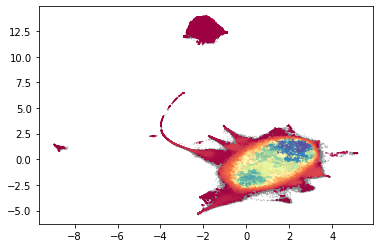

In [94]:
clustered = (labels >= 0)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')

In [95]:
labels = labels[clustered]

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

print(len(labels))
print(x_train.shape[0])

Estimated number of clusters: 16848
511110
843673


In [96]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=1000,
).fit_predict(clusterable_embedding)

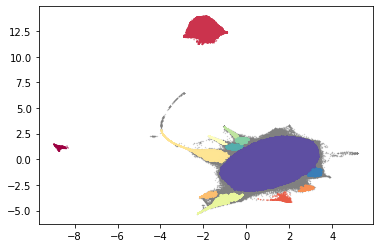

In [97]:
clustered = (labels >= 0)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')

In [98]:
print(df_train.shape)
print(labels)
#df_train = df_train.assign(label = labels)
df_train["label"] = labels
print(df_train.shape)
print(df_train)
df_train.to_csv("umap,min_samples=5,min_cluster_size=1000.csv")

labels = labels[clustered]

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

print(len(labels))
print(x_train.shape[0])

(843673, 81)
[ 1  1 12 ... 12 12 12]
(843673, 81)
        Unnamed: 0   sheep  Sensor      Date  Hour  Minutes  Seconds  \
0                0  4988.0     8.0  22_04_20  10.0     57.0     44.0   
1                1  4988.0     8.0  22_04_20  10.0     58.0      3.0   
2                2  4988.0     8.0  22_04_20  10.0     58.0     22.0   
3                3  4988.0     8.0  22_04_20  10.0     58.0     40.0   
4                4  4988.0     8.0  22_04_20  10.0     58.0     59.0   
...            ...     ...     ...       ...   ...      ...      ...   
846785       47834  5221.0    14.0  22_07_31   8.0     25.0     53.0   
846786       47835  5221.0    14.0  22_07_31   8.0     26.0      8.0   
846787       47836  5221.0    14.0  22_07_31   8.0     26.0     23.0   
846788       47837  5221.0    14.0  22_07_31   8.0     26.0     36.0   
846789       47838  5221.0    14.0  22_07_31   8.0     26.0     51.0   

                SMA          SVM        Energy  ...  a_number_peaks  \
0       1127.6

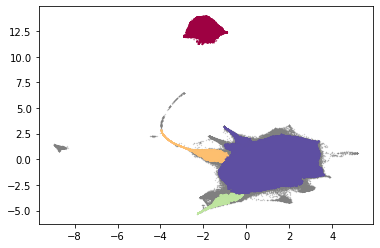

In [103]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=10000,
).fit_predict(clusterable_embedding)

clustered = (labels >= 0)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')


In [ ]:
print(labels.shape)
print(labels)
print(len(clusterable_embedding))
print(df_train.shape[0])

print(df_train.shape)
print(labels)
#df_train = df_train.assign(label = labels)
df_train["label"] = labels
print(df_train.shape)
print(df_train)
df_train.to_csv("umap,min_samples=5,min_cluster_size=10000.csv")

labels = labels[clustered]

print(len(labels))
print(labels)
print(len(clusterable_embedding))

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

(843673,)
[0 0 3 ... 3 3 3]
843673
843673
801531
[0 0 3 ... 3 3 3]
843673
Estimated number of clusters: 4
